# Waste Image Classification model:

# **1. Import libraries and dataset:**

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.10.0'

In [3]:
import zipfile
location = 'E:\Deep_Learning\Datasets\waste_management.zip'
zip_ref = zipfile.ZipFile(location, 'r')
zip_ref.extractall()
zip_ref.close()

# 2. Explore the dataset:

**1. Classes in the dataset:**

In [4]:
train_dir = 'DATASET\TRAIN'

In [5]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

In [6]:
print("Total classes in dataset: ", len(class_names))

Total classes in dataset:  2


In [7]:
print("Class names in the dataset:\n", class_names)

Class names in the dataset:
 ['O' 'R']


**2. Total number of train and test images:**

In [9]:
import os
num_train_organic_img = len(os.listdir('DATASET\TRAIN\O'))
num_train_recycle_img = len(os.listdir('DATASET\TRAIN\R')) 
num_test_organic_img = len(os.listdir('DATASET\TEST\O'))
num_test_recycle_img = len(os.listdir('DATASET\TEST\R')) 

In [10]:
print("Number of training images in the organic directory: ", num_train_organic_img)
print("Number of training images in the recycle directory: ", num_train_recycle_img)
print()
print("Number of testing images in the organic dataset: ", num_test_organic_img)
print("Number of testing images in the organic dataset: ", num_test_recycle_img)
print()
print("Total number of images in the dataset: ", num_train_organic_img+num_train_recycle_img+num_test_organic_img+num_test_recycle_img)

Number of training images in the organic directory:  12565
Number of training images in the recycle directory:  9999

Number of testing images in the organic dataset:  1401
Number of testing images in the organic dataset:  1112

Total number of images in the dataset:  25077


**3. Visualize train and test images stats:**

In [11]:
import matplotlib.pyplot as plt

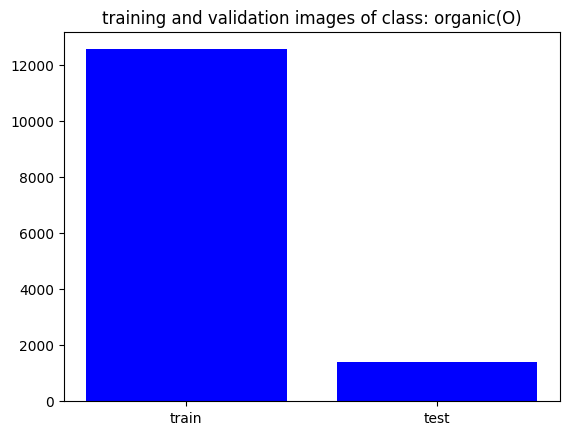

In [12]:
x = ['train', 'test']
y1 = [num_train_organic_img, num_test_organic_img]
plt.bar(x, y1, color='b')
plt.title("training and validation images of class: organic(O)")
plt.show()

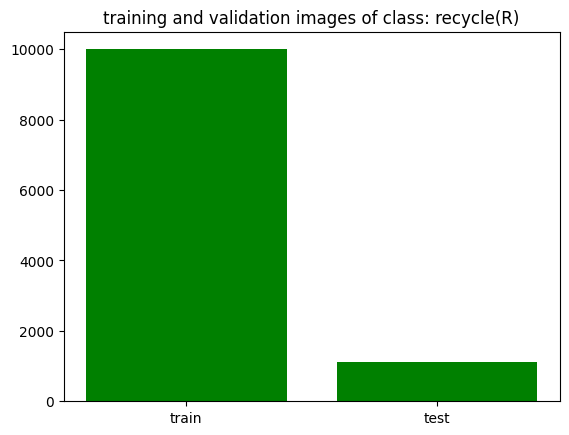

In [13]:
y2 = [num_train_recycle_img, num_test_recycle_img]
plt.bar(x, y2, color='g')
plt.title("training and validation images of class: recycle(R)")
plt.show()

# 3. Visualize random images from the dataset:

In [14]:
train_dir1 = "DATASET\TRAIN"

In [15]:
import random
import matplotlib.image as mpimg

def display_img(target_dir, target_class):
    target_folder = target_dir+"\\"+target_class
    random_img = random.sample(os.listdir(target_folder), 1)
    print(f"Random Image: {random_img}")
    img = mpimg.imread(target_folder+"/"+random_img[0])
    print(f"Shape of image is: {img.shape}")
    plt.title(target_class)
    plt.imshow(img)
    return img

Random Image: ['R_1747.jpg']
Shape of image is: (275, 183, 3)


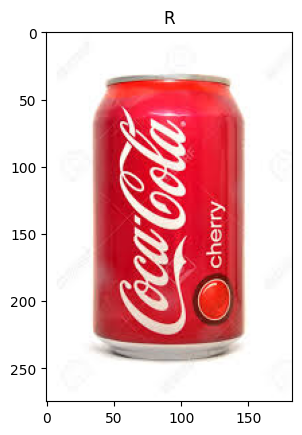

In [21]:
img1 = display_img(target_dir=train_dir, target_class=random.choice(class_names))

Random Image: ['O_11381.jpg']
Shape of image is: (168, 300, 3)


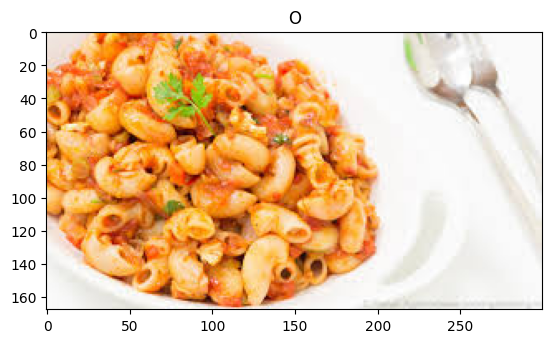

In [56]:
img2 = display_img(target_dir=train_dir, target_class=random.choice(class_names))

# 4. Preprocessing images:

In [57]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [59]:
train_dir = 'DATASET\TRAIN'
validation_dir = 'DATASET\TEST'

In [60]:
train_datagen = ImageDataGenerator(rescale=1/255.)
validation_datagen = ImageDataGenerator(rescale=1/255.)

In [61]:
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='binary')
validation_data = validation_datagen.flow_from_directory(validation_dir,
                                                        target_size=(224, 224),
                                                        batch_size=32,
                                                        class_mode='binary')

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


# 5. Build and compile the CNN model:

In [62]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), input_shape=(224, 224, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), input_shape=(224, 224, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [64]:
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [65]:
history = model.fit(train_data,
                    epochs=10,
                    steps_per_epoch=len(train_data),
                    validation_data=validation_data,
                    validation_steps=len(validation_data))

Epoch 1/10
706/706 [==============================] - 38s 45ms/step - loss: 0.4321 - accuracy: 0.8060 - val_loss: 0.3784 - val_accuracy: 0.8846
Epoch 2/10
706/706 [==============================] - 32s 45ms/step - loss: 0.3569 - accuracy: 0.8496 - val_loss: 0.2802 - val_accuracy: 0.8942
Epoch 3/10
706/706 [==============================] - 31s 44ms/step - loss: 0.3085 - accuracy: 0.8729 - val_loss: 0.2737 - val_accuracy: 0.9021
Epoch 4/10
706/706 [==============================] - 32s 45ms/step - loss: 0.2610 - accuracy: 0.8935 - val_loss: 0.3295 - val_accuracy: 0.8770
Epoch 5/10
706/706 [==============================] - 32s 45ms/step - loss: 0.1950 - accuracy: 0.9218 - val_loss: 0.3619 - val_accuracy: 0.8731
Epoch 6/10
706/706 [==============================] - 32s 45ms/step - loss: 0.1304 - accuracy: 0.9520 - val_loss: 0.4471 - val_accuracy: 0.8727
Epoch 7/10
706/706 [==============================] - 32s 45ms/step - loss: 0.0866 - accuracy: 0.9689 - val_loss: 0.5638 - val_accuracy:

# 6. Visualizing accuracy and lost curve:

**1. Accuracy Curve:**

In [66]:
def plot_accuracy_curve(history):
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(history.history['accuracy']))

  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

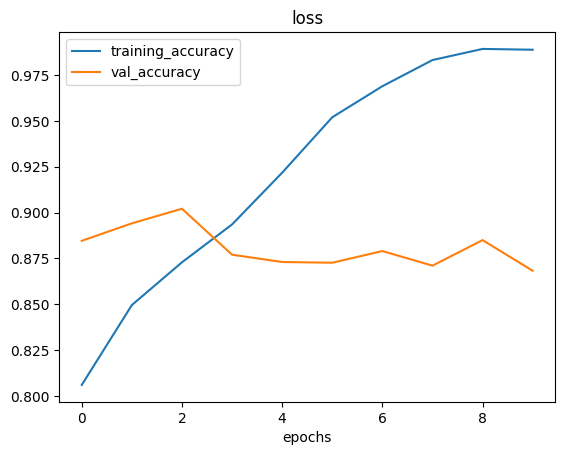

In [67]:
plot_accuracy_curve(history)

**2. Loss Curve:**

In [68]:
def plot_loss_curve(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

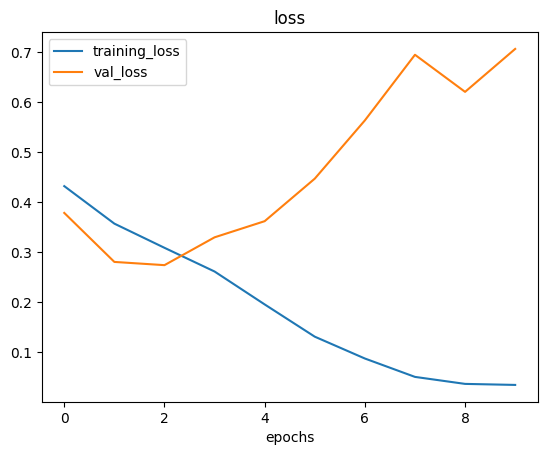

In [69]:
plot_loss_curve(history)

# 7. Checking our model performance on custom images:

In [70]:
def preprocess_img(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size=([img_shape, img_shape]))
  img = img/255.
  return img

In [71]:
def pred_plot(model, filename, class_names=class_names):
  img = preprocess_img(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))
  print("Prediction value: ", pred)
  pred_class = class_names[int(tf.round(pred))]
  if pred_class=="O":
    pred_class="Organic Waste"
  else:
    pred_class="Recycle Waste"
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 1s 524ms/step
Prediction value:  [[7.715812e-08]]


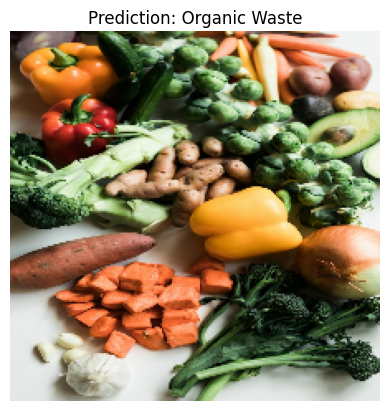

In [72]:
pred_plot(model, 'waste_images\o1.jpg')

1/1 [==============================] - 0s 25ms/step
Prediction value:  [[0.69741064]]


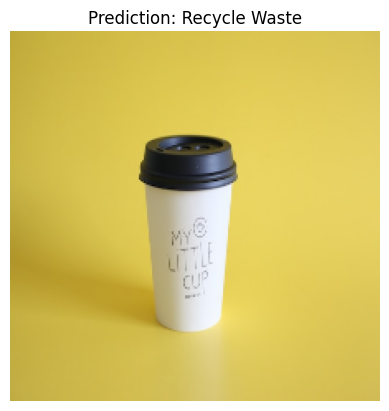

In [73]:
pred_plot(model, 'waste_images\o2.jpg')

1/1 [==============================] - 0s 26ms/step
Prediction value:  [[0.00605548]]


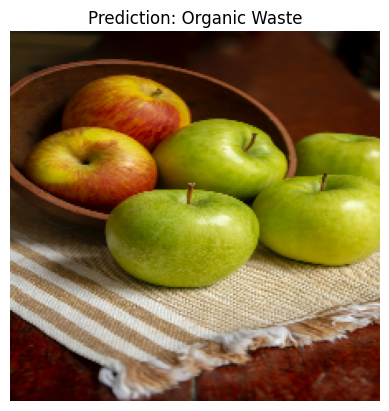

In [74]:
pred_plot(model, 'waste_images\o3.jpg')

1/1 [==============================] - 0s 25ms/step
Prediction value:  [[0.99999475]]


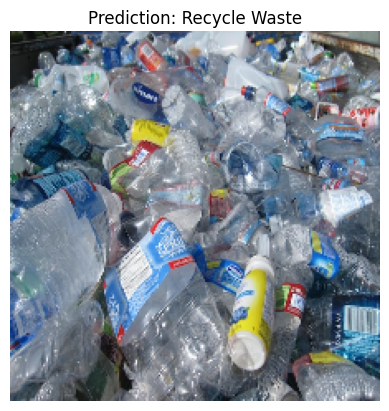

In [75]:
pred_plot(model, 'waste_images\pic1.jpg')

1/1 [==============================] - 0s 27ms/step
Prediction value:  [[0.9999933]]


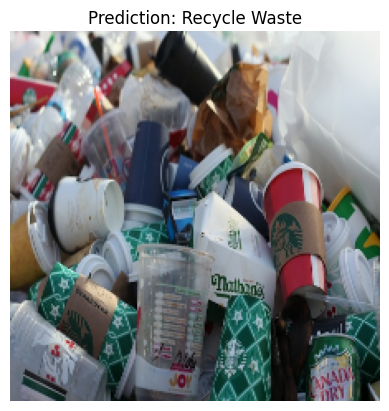

In [76]:
pred_plot(model, 'waste_images\pic2.jpg')